# Mediation Analysis
Written by Jin Cheong & Luke Chang

A mediation analysis is conducted when a researcher is interested in the **mechanism** underlying how variable X has an effect on variable Y. It attempts to make a causal inference that a direct effect might be better explained by an indirect effect through a mediating variable.  

Consider the instance below where X has an effect **c** on Y:

### 1) $Y = \beta_1 + c \cdot X $

In this model, there may be a third variable **M** which mediates the effect of X on Y. In other words, the variable M is partially responsible for the effect X has on Y.

￼To conduct a mediation analysis one estimates two additional models: 1) the effect of X on M, and 2) the effect of X *and* M on Y. 

### 2) $M = \beta_2 + a \cdot X $

### 3) $Y = \beta_3 + c' \cdot X + b \cdot M $  
  
  
Now the direct effect of X on Y, denoted as **C**,can be broken down into two parts:

### $c = a \cdot b + c' $

$ a \cdot b $ is the indirect effect of X on Y via the mediator. 
$c'$ is the remaining direct effect of X on Y controlling for M.  

This relationship is depicted below.  Note that M and Y both also have error included in the model.

***Question*** Why does X not have error included in the model?

***Answer*** Because X is only a regressor not an outcome variable in the models and standard regression does not estimate error on regressors.  See [orthogonal regression](http://davegiles.blogspot.com/2014/11/orthogonal-regression-first-steps.html) for a technique that models error on both X and Y.

<img src="Figures/mediation1.png",width=500,align='center'>


### Here are a few examples of mediations. Can you think of more?

1) The effect of failure on depressed feelings is mediated by internalization of failure. 

2) Reward conditioning is mediated by attention. 

3) Effect of treatment is mediated by mindfulness. 

4) Effect of food intake on weight gain is mediated by metabolism.

#### For more information there is a nice [tutorial](http://davidakenny.net/cm/mediate.htm) on mediation by David Kenny, one of the author's of the original mediation paper.

## Simulate a mediation

In this section we will simulate a mediation.

This is a case in which the true effect of X on Y is positive, but appears negative without testing for mediation. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

def sobel_test(a, b, se_a, se_b):
    '''
    Sobel test for significance of mediation
    Input: 
    a: coefficient from X to mediator variable, M
    b: coefficient from M to Y 
    se_a: Standard error of A
    se_b: Standard error fo B
    Returns: 
    t: Sobel's test statistic
    pval : Two-tailed probability assuming normal distribution
    '''
    SE = np.sqrt( (a**2)*(se_a**2) + (b**2)*(se_b**2))
    t = (a*b) / SE
    n = 100000000
    pval = stats.t.sf(np.abs(t), n-1)*2
    return t, pval

In [2]:
# set random seed so everyone gets same results
np.random.seed(1)
# Determine effects
a = -3 # effect of x to M
b = 3 # effect of M to y
cq = .1 #  effect of x on y controlling for M

# Create a random data x
x = np.random.rand(100) 
m = x * a + np.random.rand(100)

# Create Y
y = np.dot(np.array([x,m]).T,[cq,b]) + np.random.rand(100)

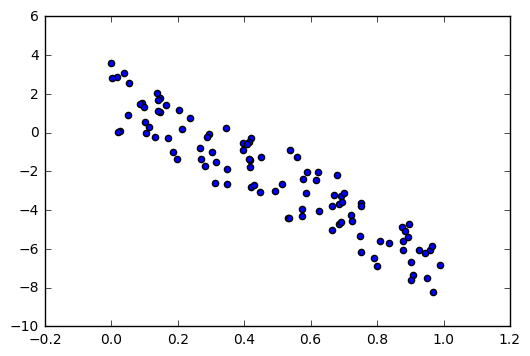

In [3]:
plt.scatter(x,y)

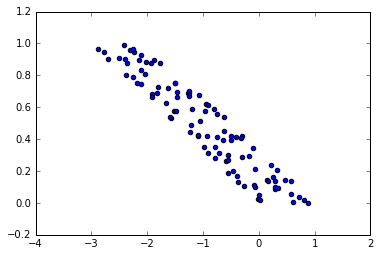

In [16]:
plt.scatter(m,x)

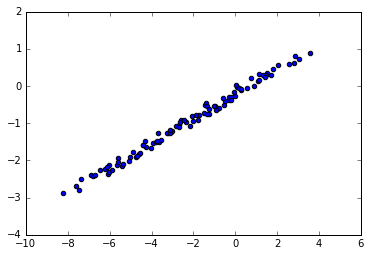

In [15]:
plt.scatter(y,m)

### 1) Test effect of X on Y

In [2]:
X = df.add_constant(x)
lm1 = smf.OLS(X,y).fit()
print lm1.summary()
ec = lm1.params[1] # save total effect c to ec

NameError: name 'df' is not defined

### 2) Test effect of X on M

In [5]:
X = sm.add_constant(x)
lm2 = smf.OLS(m,X).fit()
print lm2.summary()
ea = lm2.params[1] # Save the effect of X on M, a, to ea
sea = lm2.bse[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     778.6
Date:                Mon, 16 May 2016   Prob (F-statistic):           2.01e-48
Time:                        10:26:04   Log-Likelihood:                -26.736
No. Observations:                 100   AIC:                             57.47
Df Residuals:                      98   BIC:                             62.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4978      0.062      8.078      0.0

### 3) Test effect of  X and M on Y 

In [6]:
X = np.array([x,m]).T
X = sm.add_constant(X) 
lm3 = smf.OLS(y,X).fit()
print lm3.summary()
ecq,eb = lm3.params[1:3]
seb = lm3.bse[2]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5091.
Date:                Mon, 16 May 2016   Prob (F-statistic):           5.98e-99
Time:                        10:26:04   Log-Likelihood:                -13.113
No. Observations:                 100   AIC:                             32.23
Df Residuals:                      97   BIC:                             40.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5435      0.070      7.790      0.0

### Show how the effect is broken down to direct and indirect effects
Recall how the overall effect C was decomposed to indirect effect (a*b) and direct effect (c')
### $c = a \cdot b + c' $

In [7]:
print 'c : ', ec
print 'a : ', ea
print 'b : ', eb
print 'c\' : ', ecq

c :  -9.02055253349
a :  -3.02671026091
b :  3.0620641022
c' :  0.247428304212


In [8]:
print 'Total effect C:', ec
print 'is decomposed into the indirect(mediated) effect a*b :', ea*eb
print 'plus the direct effect c\'', ecq
print 'which adds up to ', ea*eb+ecq

Total effect C: -9.02055253349
is decomposed into the indirect(mediated) effect a*b : -9.2679808377
plus the direct effect c' 0.247428304212
which adds up to  -9.02055253349


## Run a Sobel Test for Significance of Mediation

One way to test the signifiance of a mediation is to perform a Sobel test, where the indirect effect(a*b) is divided by an esitmated standard error of the two. This assumes that the product would be normally distributed which may not always be the case. 

An alternative method is to bootstrap with replacement on the observed data to generate a 95% confidence interval. You can try this by writing a for-loop that resamples from the data and generate a distribution of the indirect effects(a*b). If the confidence interval does not include 0, it can be considered as significant. 

In [17]:
t,p = sobel_test(ea,eb,sea,seb)
print 'Sobel\'s test of significance t = %2.2f' %t
print 'Two-tailed p-value p = %2.5f ' %p

Sobel's test of significance t = -21.76
Two-tailed p-value p = 0.00000 


# Moderation Analysis

In a moderation analysis, the moderator is a variable that explains the relationship between two other variables, similar to an interaction term. Moderation is slightly different from an interaction due to the additional constraint that there is a causal relationship from X to Y BUT not from Z to Y. Therefore, a moderation implies an interaction exists but an interaction does not imply a moderation. 

To recap, a mediating variable we just covered is one that influences the strength of X on Y. 

Here is a schematic representation of a moderation relationship. 
This diagram hypothesize that Stress has a causal relationship to Depression 
but the effect of Stress is different for people with high or low Social Support 

<img src="Figures/moderator2.gif",width=500,align='center'>

This can be reprsented by an interaction, 



<img src="Figures/moderator3.jpeg",width=500,align='center'>


The pictures have been retrieved from [here](http://www.victoria.ac.nz/psyc/paul-jose-files/helpcentre/help5_moderation_example.php)

### Here are a few examples of moderations. Can you think of more?

1) The effect of compliments on future grades is moderated by growth mindset [(Carol Dweck)](http://mindsetonline.com/)

2) Effect of alcohol on emotion is moderated by mood.    

3) Effect of pressure on performance is moderated by confidence (chocking vs boosting). 

### For more information look at [homepage of Kenny](http://davidakenny.net/cm/moderation.htm) who started all this. 

## Example 
Here we examine whether the effect of buying books(**buy**) on enjoyment of reading(**enjoy**) is moderated by frequency of reading(**read**).

The moderation effect exists if there is an interaction of buying and reading on enjoyment.

In [10]:
df = {'enjoy':[4,15,1,11,13,19,6,10,15,3,11,20,7,11,10,6,7,18,8,2,7,12,13,15,4,3,9,7,10,2,15,1,3,6,13,15,16,14,1,8],
'buy':[16,19,0,19,25,24,22,21,13,7,28,31,4,26,11,12,14,16,20,13,12,23,22,19,12,10,7,22,7,0,16,17,11,5,29,29,20,16,3,8
],
'read':[6,13,1,13,12,11,7,8,12,4,15,14,7,14,9,5,7,12,10,6,9,13,9,13,9,5,7,8,8,2,7,6,9,9,15,11,9,7,2,10
]}
df = pd.DataFrame(df)

# Importance of centering variables for interaction
The interaction effect can be **VERY** different if you don't center your variables

In [11]:
df['inter'] = df.read*df.buy
np.corrcoef(df.buy,df.inter)

array([[ 1.        ,  0.91944697],
       [ 0.91944697,  1.        ]])

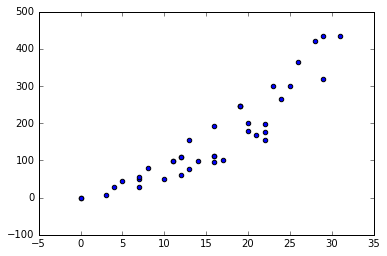

In [18]:
plt.scatter(df.buy,df.inter)

In [12]:
df['normint'] = ((df.read-np.mean(df.read))/np.std(df.read))*((df.buy-np.mean(df.buy))/np.std(df.buy))
np.corrcoef(df.buy,df.normint)

array([[ 1.        , -0.07935977],
       [-0.07935977,  1.        ]])

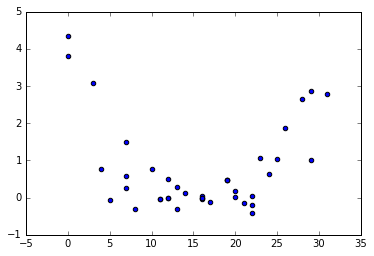

In [19]:
plt.scatter(df.buy,df.normint)

In [13]:
mod = smf.ols(formula = "enjoy ~ buy + read + normint", data = df).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                  enjoy   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     15.23
Date:                Mon, 16 May 2016   Prob (F-statistic):           1.47e-06
Time:                        10:26:05   Log-Likelihood:                -106.98
No. Observations:                  40   AIC:                             222.0
Df Residuals:                      36   BIC:                             228.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3201      1.682     -0.190      0.8

# Exercises

1) Think about mediating or moderating variables that may be present in your data. 


2) What are the underlying assumptions of mediation or moderation? How might they be violated in average research settings? 


In [4]:
df = pd.read_csv('../Data/salary.csv',sep = ',', header='infer')